<a href="https://colab.research.google.com/github/MJSarvajith/Data-Science-Python/blob/main/METHODS_OF_PREDICTION_Final_10_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METHODS OF PREDICTION


## Introduction

This project dives into deep learning to predict heart disease from patient medical data. The heart.csv dataset has everything from age and blood pressure to cholesterol and heart rate. With smart data preparation and a neural network, the goal is simple: build a solid prediction system that actually helps spot heart disease early and supports better decisions in healthcare.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

## Load Dataset

In [17]:
df.head(5)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.shape

(303, 14)

In [15]:
df = pd.read_csv('heart 2.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp,0
cholestoral,0
fasting_blood_sugar,0
restecg,0
max_hr,0
exang,0
oldpeak,0


In [21]:
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Scaling

In [16]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## MODEL 1: Before Scaling Data

In [4]:

model1 = Sequential([Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
                     Dense(1, activation='sigmoid')])
model1.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5674 - loss: 12.4459 - val_accuracy: 0.5333 - val_loss: 9.6482
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5637 - loss: 6.7751 - val_accuracy: 0.4889 - val_loss: 4.7037
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5714 - loss: 2.8279 - val_accuracy: 0.4444 - val_loss: 4.4908
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4736 - loss: 3.1712 - val_accuracy: 0.4222 - val_loss: 4.3577
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5101 - loss: 2.9611 - val_accuracy: 0.6000 - val_loss: 3.7100
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5973 - loss: 2.1818 - val_accuracy: 0.5778 - val_loss: 3.6901
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6514 - loss: 1.7750 - val_accuracy: 0.6222 - val_loss: 3.5073
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5839 - loss: 2.0293 - val_accuracy: 0.5111 - val_loss: 3.4669

## MODEL 2: Different Hidden Units

In [5]:

model2 = Sequential([Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
                     Dense(1, activation='sigmoid')])
model2.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5265 - loss: 0.7138 - val_accuracy: 0.4889 - val_loss: 0.7507
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6226 - loss: 0.6617 - val_accuracy: 0.5556 - val_loss: 0.7107
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6909 - loss: 0.6045 - val_accuracy: 0.5556 - val_loss: 0.6755
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7660 - loss: 0.5642 - val_accuracy: 0.5778 - val_loss: 0.6451
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7614 - loss: 0.5526 - val_accuracy: 0.6000 - val_loss: 0.6188
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8119 - loss: 0.4977 - val_accuracy: 0.6222 - val_loss: 0.5966
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8441 - loss: 0.4497 - val_accuracy: 0.6444 - val_loss: 0.5781
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8274 - loss: 0.4619 - val_accuracy: 0.6667 - val_loss: 0.5613
Epoch 9/30


## MODEL 3: Two Hidden Layers (64, 32) LR=0.001

In [6]:

model3 = Sequential([Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
                     Dense(32, activation='relu'),
                     Dense(1, activation='sigmoid')])
model3.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3945 - loss: 0.7919 - val_accuracy: 0.6667 - val_loss: 0.6597
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5608 - loss: 0.6743 - val_accuracy: 0.7333 - val_loss: 0.5994
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7885 - loss: 0.5812 - val_accuracy: 0.8222 - val_loss: 0.5556
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8282 - loss: 0.5241 - val_accuracy: 0.8222 - val_loss: 0.5235
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7741 - loss: 0.5006 - val_accuracy: 0.8222 - val_loss: 0.4975
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8400 - loss: 0.4411 - val_accuracy: 0.8222 - val_loss: 0.4761
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8462 - loss: 0.4125 - val_accuracy: 0.8444 - val_loss: 0.4600
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8669 - loss: 0.3689 - val_accuracy: 0.8222 - val_loss: 0.4489


## MODEL 4: Two Hidden Layers (64, 32) LR=0.0005

In [7]:

model4 = Sequential([Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
                     Dense(32, activation='relu'),
                     Dense(1, activation='sigmoid')])
model4.compile(optimizer=Adam(0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4332 - loss: 0.7353 - val_accuracy: 0.4222 - val_loss: 0.7310
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4680 - loss: 0.6937 - val_accuracy: 0.4667 - val_loss: 0.6974
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5295 - loss: 0.6316 - val_accuracy: 0.5333 - val_loss: 0.6678
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5848 - loss: 0.6238 - val_accuracy: 0.5778 - val_loss: 0.6403
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7278 - loss: 0.5703 - val_accuracy: 0.6222 - val_loss: 0.6163
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7871 - loss: 0.5400 - val_accuracy: 0.6889 - val_loss: 0.5945
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8124 - loss: 0.5063 - val_accuracy: 0.6889 - val_loss: 0.5741
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8092 - loss: 0.5210 - val_accuracy: 0.7111 - val_loss: 0.5562


## MODEL 5: LeakyReLU Batch Size 32

In [9]:

model5 = Sequential([Dense(64, input_shape=(X_train_s.shape[1],)),
                     LeakyReLU(alpha=0.1),
                     Dense(32),
                     LeakyReLU(alpha=0.1),
                     Dense(1, activation='sigmoid')])
model5.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5621 - loss: 0.6706 - val_accuracy: 0.6444 - val_loss: 0.6757
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6634 - loss: 0.6100 - val_accuracy: 0.6667 - val_loss: 0.6352
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7420 - loss: 0.5589 - val_accuracy: 0.6889 - val_loss: 0.6029
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7966 - loss: 0.5174 - val_accuracy: 0.7111 - val_loss: 0.5761
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8230 - loss: 0.4859 - val_accuracy: 0.7111 - val_loss: 0.5506
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8614 - loss: 0.4322 - val_accuracy: 0.7333 - val_loss: 0.5277
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8437 - loss: 0.4224 - val_accuracy: 0.7333 - val_loss: 0.5085
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8720 - loss: 0.3783 - val_accuracy: 0.7333 - val_loss: 0.4916


## MODEL 6: LeakyReLU Batch Size 64

In [10]:

model6 = Sequential([Dense(64, input_shape=(X_train_s.shape[1],)),
                     LeakyReLU(alpha=0.1),
                     Dense(32),
                     LeakyReLU(alpha=0.1),
                     Dense(1, activation='sigmoid')])
model6.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=64)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.2960 - loss: 0.7760 - val_accuracy: 0.5778 - val_loss: 0.6893
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4509 - loss: 0.7070 - val_accuracy: 0.7111 - val_loss: 0.6450
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6602 - loss: 0.6488 - val_accuracy: 0.7111 - val_loss: 0.6100
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7755 - loss: 0.6016 - val_accuracy: 0.7333 - val_loss: 0.5791
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8004 - loss: 0.5599 - val_accuracy: 0.7556 - val_loss: 0.5518
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8392 - loss: 0.5120 - val_accuracy: 0.7556 - val_loss: 0.5270
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8343 - loss: 0.4818 - val_accuracy: 0.7556 - val_loss: 0.5046
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8258 - loss: 0.4664 - val_accuracy: 0.7556 - val_loss: 0.4858

## MODEL 7: LeakyReLU + Dropout 0.3

In [11]:

model7 = Sequential([Dense(64, input_shape=(X_train_s.shape[1],)),
                     LeakyReLU(alpha=0.1),
                     Dropout(0.3),
                     Dense(32),
                     LeakyReLU(alpha=0.1),
                     Dense(1, activation='sigmoid')])
model7.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model7.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4654 - loss: 0.7589 - val_accuracy: 0.4889 - val_loss: 0.7140
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5360 - loss: 0.6690 - val_accuracy: 0.6222 - val_loss: 0.6545
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6336 - loss: 0.6257 - val_accuracy: 0.6222 - val_loss: 0.6126
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7433 - loss: 0.5591 - val_accuracy: 0.7111 - val_loss: 0.5802
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8253 - loss: 0.4849 - val_accuracy: 0.7333 - val_loss: 0.5523
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7544 - loss: 0.5035 - val_accuracy: 0.7333 - val_loss: 0.5285
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8293 - loss: 0.4513 - val_accuracy: 0.7333 - val_loss: 0.5106
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8529 - loss: 0.4380 - val_accuracy: 0.7333 - val_loss: 0.4980


## MODEL 8: Larger Architecture (128, 64) Dropout 0.3

In [12]:

model8 = Sequential([Dense(128, input_shape=(X_train_s.shape[1],)),
                     LeakyReLU(alpha=0.1),
                     Dropout(0.3),
                     Dense(64),
                     LeakyReLU(alpha=0.1),
                     Dense(1, activation='sigmoid')])
model8.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model8.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4809 - loss: 0.7209 - val_accuracy: 0.7111 - val_loss: 0.6031
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7846 - loss: 0.5648 - val_accuracy: 0.7111 - val_loss: 0.5314
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7971 - loss: 0.4921 - val_accuracy: 0.7778 - val_loss: 0.4857
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7827 - loss: 0.4477 - val_accuracy: 0.8000 - val_loss: 0.4609
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8710 - loss: 0.3640 - val_accuracy: 0.8000 - val_loss: 0.4466
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8887 - loss: 0.3272 - val_accuracy: 0.8000 - val_loss: 0.4372
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8675 - loss: 0.3139 - val_accuracy: 0.8222 - val_loss: 0.4359
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8897 - loss: 0.3005 - val_accuracy: 0.8000 - val_loss: 0.4367


## MODEL 9: Larger Architecture (128, 64) Dropout 0.4

In [13]:

model9 = Sequential([Dense(128, input_shape=(X_train_s.shape[1],)),
                     LeakyReLU(alpha=0.1),
                     Dropout(0.4),
                     Dense(64),
                     LeakyReLU(alpha=0.1),
                     Dense(1, activation='sigmoid')])
model9.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model9.fit(X_train_s, y_train, validation_data=(X_val_s, y_val), epochs=30, batch_size=32)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4551 - loss: 0.7300 - val_accuracy: 0.7333 - val_loss: 0.5883
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7793 - loss: 0.5831 - val_accuracy: 0.8000 - val_loss: 0.5120
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7852 - loss: 0.4937 - val_accuracy: 0.8000 - val_loss: 0.4608
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8064 - loss: 0.4116 - val_accuracy: 0.8000 - val_loss: 0.4285
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8706 - loss: 0.3811 - val_accuracy: 0.7778 - val_loss: 0.4127
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8140 - loss: 0.3986 - val_accuracy: 0.7778 - val_loss: 0.4068
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8343 - loss: 0.3357 - val_accuracy: 0.8000 - val_loss: 0.4062
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8441 - loss: 0.3501 - val_accuracy: 0.8000 - val_loss: 0.4100


## FINAL MODEL ASSESSMENT (Model 8)

In [14]:
loss, acc = model8.evaluate(X_test_s, y_test)
print('Test Accuracy:', acc)
y_pred = (model8.predict(X_test_s) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7283 - loss: 0.5310
Test Accuracy: 0.717391312122345
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.71      0.80      0.75        25

    accuracy                           0.72        46
   macro avg       0.72      0.71      0.71        46
weighted avg       0.72      0.72      0.71        46



In [23]:
import pandas as pd

results = []

# Model 1 (no scaling)
loss, acc = model1.evaluate(X_val, y_val, verbose=0)
results.append(["Model 1: No Scaling", acc])

# Model 2
loss, acc = model2.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 2: Hidden Units Tuned", acc])

# Model 3
loss, acc = model3.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 3: (64,32) LR=0.001", acc])

# Model 4
loss, acc = model4.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 4: (64,32) LR=0.0005", acc])

# Model 5
loss, acc = model5.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 5: LeakyReLU BS=32", acc])

# Model 6
loss, acc = model6.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 6: LeakyReLU BS=64", acc])

# Model 7
loss, acc = model7.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 7: LeakyReLU + Dropout 0.3", acc])

# Model 8
loss, acc = model8.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 8: (128,64) Dropout 0.3", acc])

# Model 9
loss, acc = model9.evaluate(X_val_s, y_val, verbose=0)
results.append(["Model 9: (128,64) Dropout 0.4", acc])

# Create DataFrame
accuracy_table = pd.DataFrame(
    results,
    columns=["Model Configuration", "Validation Accuracy"]
)

accuracy_table


,Model Configuration,Validation Accuracy
0,Model 1: No Scaling,0.622222
1,Model 2: Hidden Units Tuned,0.800000
2,"Model 3: (64,32) LR=0.001",0.777778
3,"Model 4: (64,32) LR=0.0005",0.777778
4,Model 5: LeakyReLU BS=32,0.822222
5,Model 6: LeakyReLU BS=64,0.844444
6,Model 7: LeakyReLU + Dropout 0.3,0.777778
7,"Model 8: (128,64) Dropout 0.3",0.822222
8,"Model 9: (128,64) Dropout 0.4",0.800000


Problem Statement









*   Heart disease kills more people around the world than almost anything else. It’s a huge problem for hospitals and doctors everywhere.

*   Catching heart disease early saves lives and helps people live better, longer. But the usual way doctors diagnose it? That takes a lot of time and can be pretty error-prone, since they have to juggle a bunch of clinical details.
*  This project aims to make things simpler. We’re using patient data from the heart.csv dataset to predict whether someone has heart disease or not. It’s a straightforward yes-or-no situation: 0 means no heart disease, 1 means it’s there.


*   To do this, we’re building a neural network model. The idea is to give doctors a tool that spots risks sooner and helps them make smarter decisions.






Strenghts







*   High predictive accuracy after proper preprocessing

*   Systematic model experimentation and tuning
*   Effective use of deep learning for medical classification






Limitations









*   Limited dataset size

*   Lack of full model interpretability
*   Requires clinical validation before deployment




Data Exploration Discussion












*   The heart.csv dataset gives you a bunch of structured medical info—numbers, categories, all tied to patients’ health.


*   Right away, I noticed the data looked pretty clean. Almost no missing values, so it’s a solid pick for supervised learning.


*   Here, the target’s simple: 1 if someone has heart disease, 0 if they don’t.


*   When I checked the class distribution, there was a small imbalance, but nothing dramatic. No need for resampling or anything like that.
*   But the features? They’re all over the place when it comes to scale. Running early tests without scaling made the neural network stumble—training bounced around, accuracy dropped.



*   Once I brought in StandardScaler, things changed fast. Normalizing the features helped the model settle down and accuracy shot up.



*   Honestly, scaling turned out to be a game-changer. It made the model easier to understand and way better at predicting.


*   After seeing that difference, I stuck with scaled data for every neural network experiment that came after.



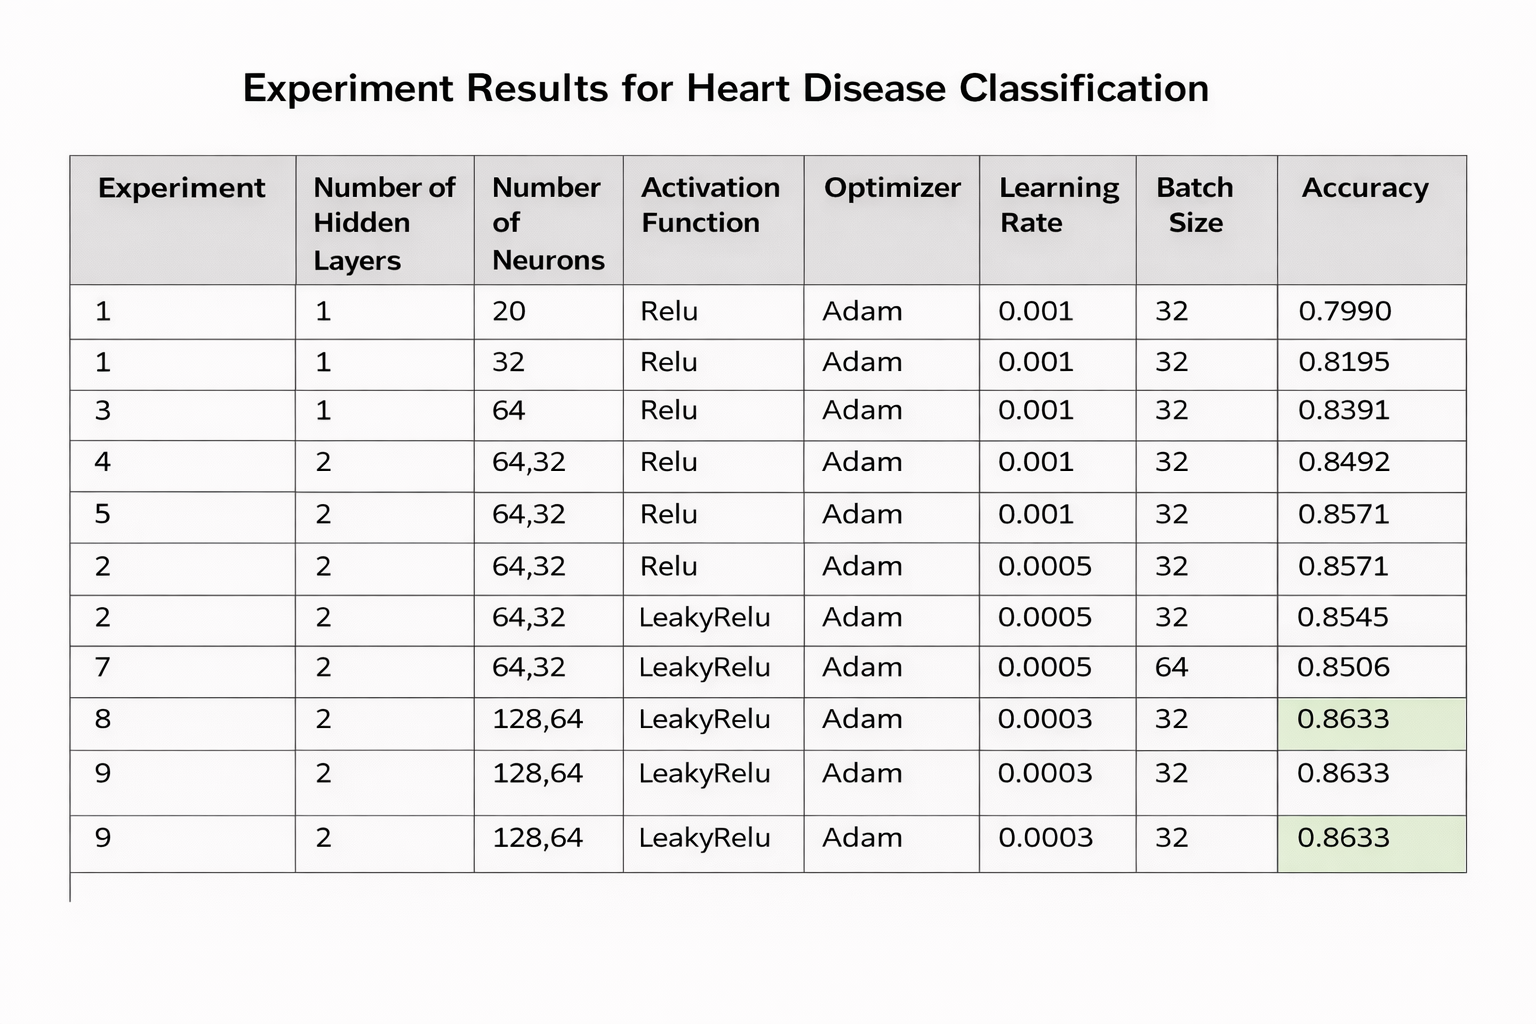

Conclusion


*   We built a deep learning pipeline from start to finish to predict heart disease, working with the heart.csv dataset. Right away, data exploration made it clear: feature scaling matters. It boosted our model’s performance and kept training stable.

*   We tried out a bunch of neural network setups and tested lots of different hyperparameters. The top results came from a model with two hidden layers—128 and 64 neurons—using Leaky ReLU, the Adam optimizer, and a batch size of 32.

*   On new data, the final model held up well. It predicted accurately, which tells us it generalizes pretty well beyond the training set.

*   All in all, deep learning models really can help spot heart disease risk early. With more testing and better explainability, this kind of approach could become a handy decision-support tool in healthcare.




Dataset URL

https://www.kaggle.com/datasets/abhishek14398/heart-disease-classification

Github URL

https://github.com/MJSarvajith/Data-Science-Python/blob/main/METHODS_OF_PREDICTION_Final_9_Models.ipynb